# Checking annotations

> We're going to check all the different annotations we have.

In [ ]:
#| hide
import os
from glob import glob
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mne

from sleepstagingidal.data import *
from sleepstagingidal.dataa import *
from sleepstagingidal.feature_extraction import *
from sleepstagingidal.cross_validation import *

In [ ]:
#| hide
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [ ]:
#| hide
path_data = "/media/2tbraid/antonia/PSG/"

We are going to load all the files and check their `.annotations` attribute to extract the important ones:

In [ ]:
path_files = glob(os.path.join(path_data, "*.edf"))
len(path_files)

36

In [ ]:
raws = [mne.io.read_raw_edf(path, preload=False, verbose=False) for path in path_files]

In [ ]:
anns = np.concatenate([raw.annotations.description for raw in raws])
len(anns)

70822

It's easier to understand the information if we represent it visually:

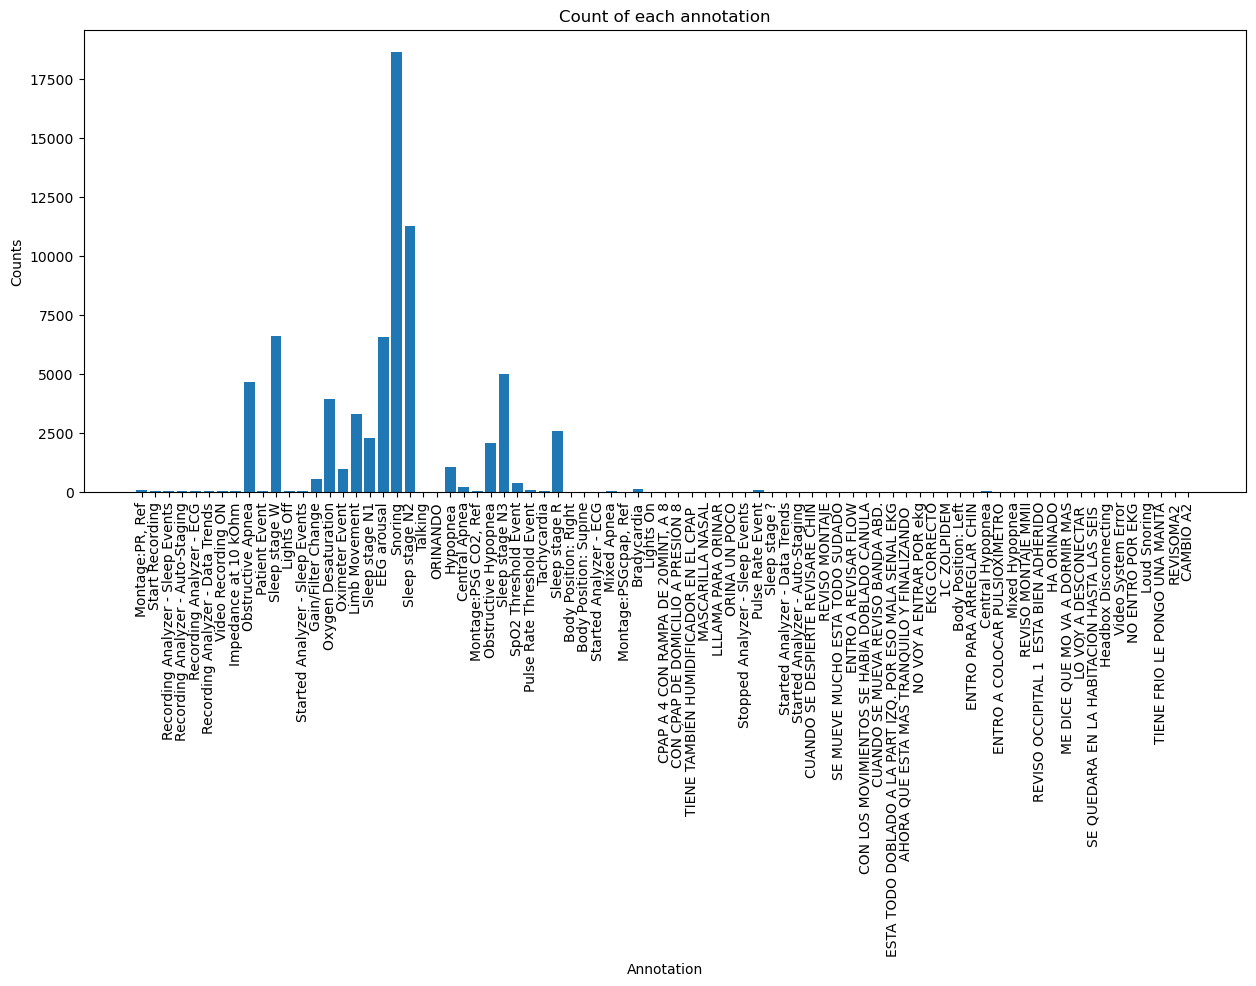

In [ ]:
cntr = Counter(anns)
plt.figure(figsize=(15,6))
plt.bar(cntr.keys(), cntr.values())
plt.xticks(rotation=90)
plt.xlabel("Annotation")
plt.ylabel("Counts")
plt.title("Count of each annotation")
plt.show()

It can be usefull as well to store this information as a `.csv`:

In [ ]:
df_anns = pd.DataFrame.from_dict(cntr, orient='index', columns=['Counts'])
df_anns.index.set_names('Annotation', inplace=True)
df_anns.head()

,Counts
Annotation,
"Montage:PR, Ref",56
Start Recording,37
Recording Analyzer - Sleep Events,36
Recording Analyzer - Auto-Staging,36
Recording Analyzer - ECG,36


In [ ]:
df_anns.to_csv("annotations.csv")